In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


In [73]:
df=pd.read_csv('loan_sanction_train.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [74]:
df_copy=df.copy()

In [75]:
df.shape

(614, 13)

In [76]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [77]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [78]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [79]:
df.shape

(614, 13)

# Data preprocessing

In [80]:
for i,column in enumerate(df.columns):
    print("{}. ".format(i)+"{}".format(column)+": {}".format(df[column].nunique()))
    print("unique elements : ", df[column].unique())
    print('------------------------------------------------------------')
    

0. Loan_ID: 614
unique elements :  ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP0

In [81]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [82]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
df.fillna({'Gender':df['Gender'].mode()[0],
    'Dependents':df['Dependents'].mode()[0],
           'Self_Employed':df['Self_Employed'].mode()[0],
           'Married':df['Married'].mode()[0],
         'LoanAmount':round(df['LoanAmount'].mean(),1),
           'Credit_History':df['Credit_History'].mode()[0],
          'Loan_Amount_Term':df['Loan_Amount_Term'].mode()[0]},inplace=True)

In [84]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [85]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [86]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
le=LabelEncoder()
obj=df.select_dtypes(include=object).columns
for i in obj:
    df[i]=le.fit_transform(df[i])

In [88]:

l=df.select_dtypes(include=float).columns
for i in l:
    df[i]=df[i].map(lambda x:int(x))
    

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1


In [90]:
df=df.drop('Loan_ID',axis=1)


In [91]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


<AxesSubplot:>

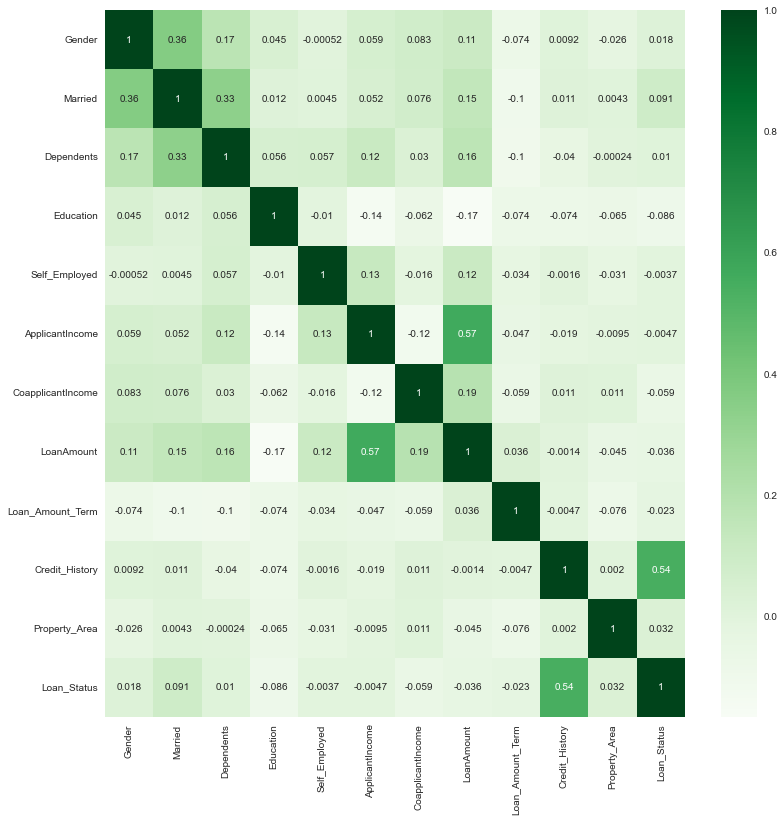

In [92]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

# Data visualisation

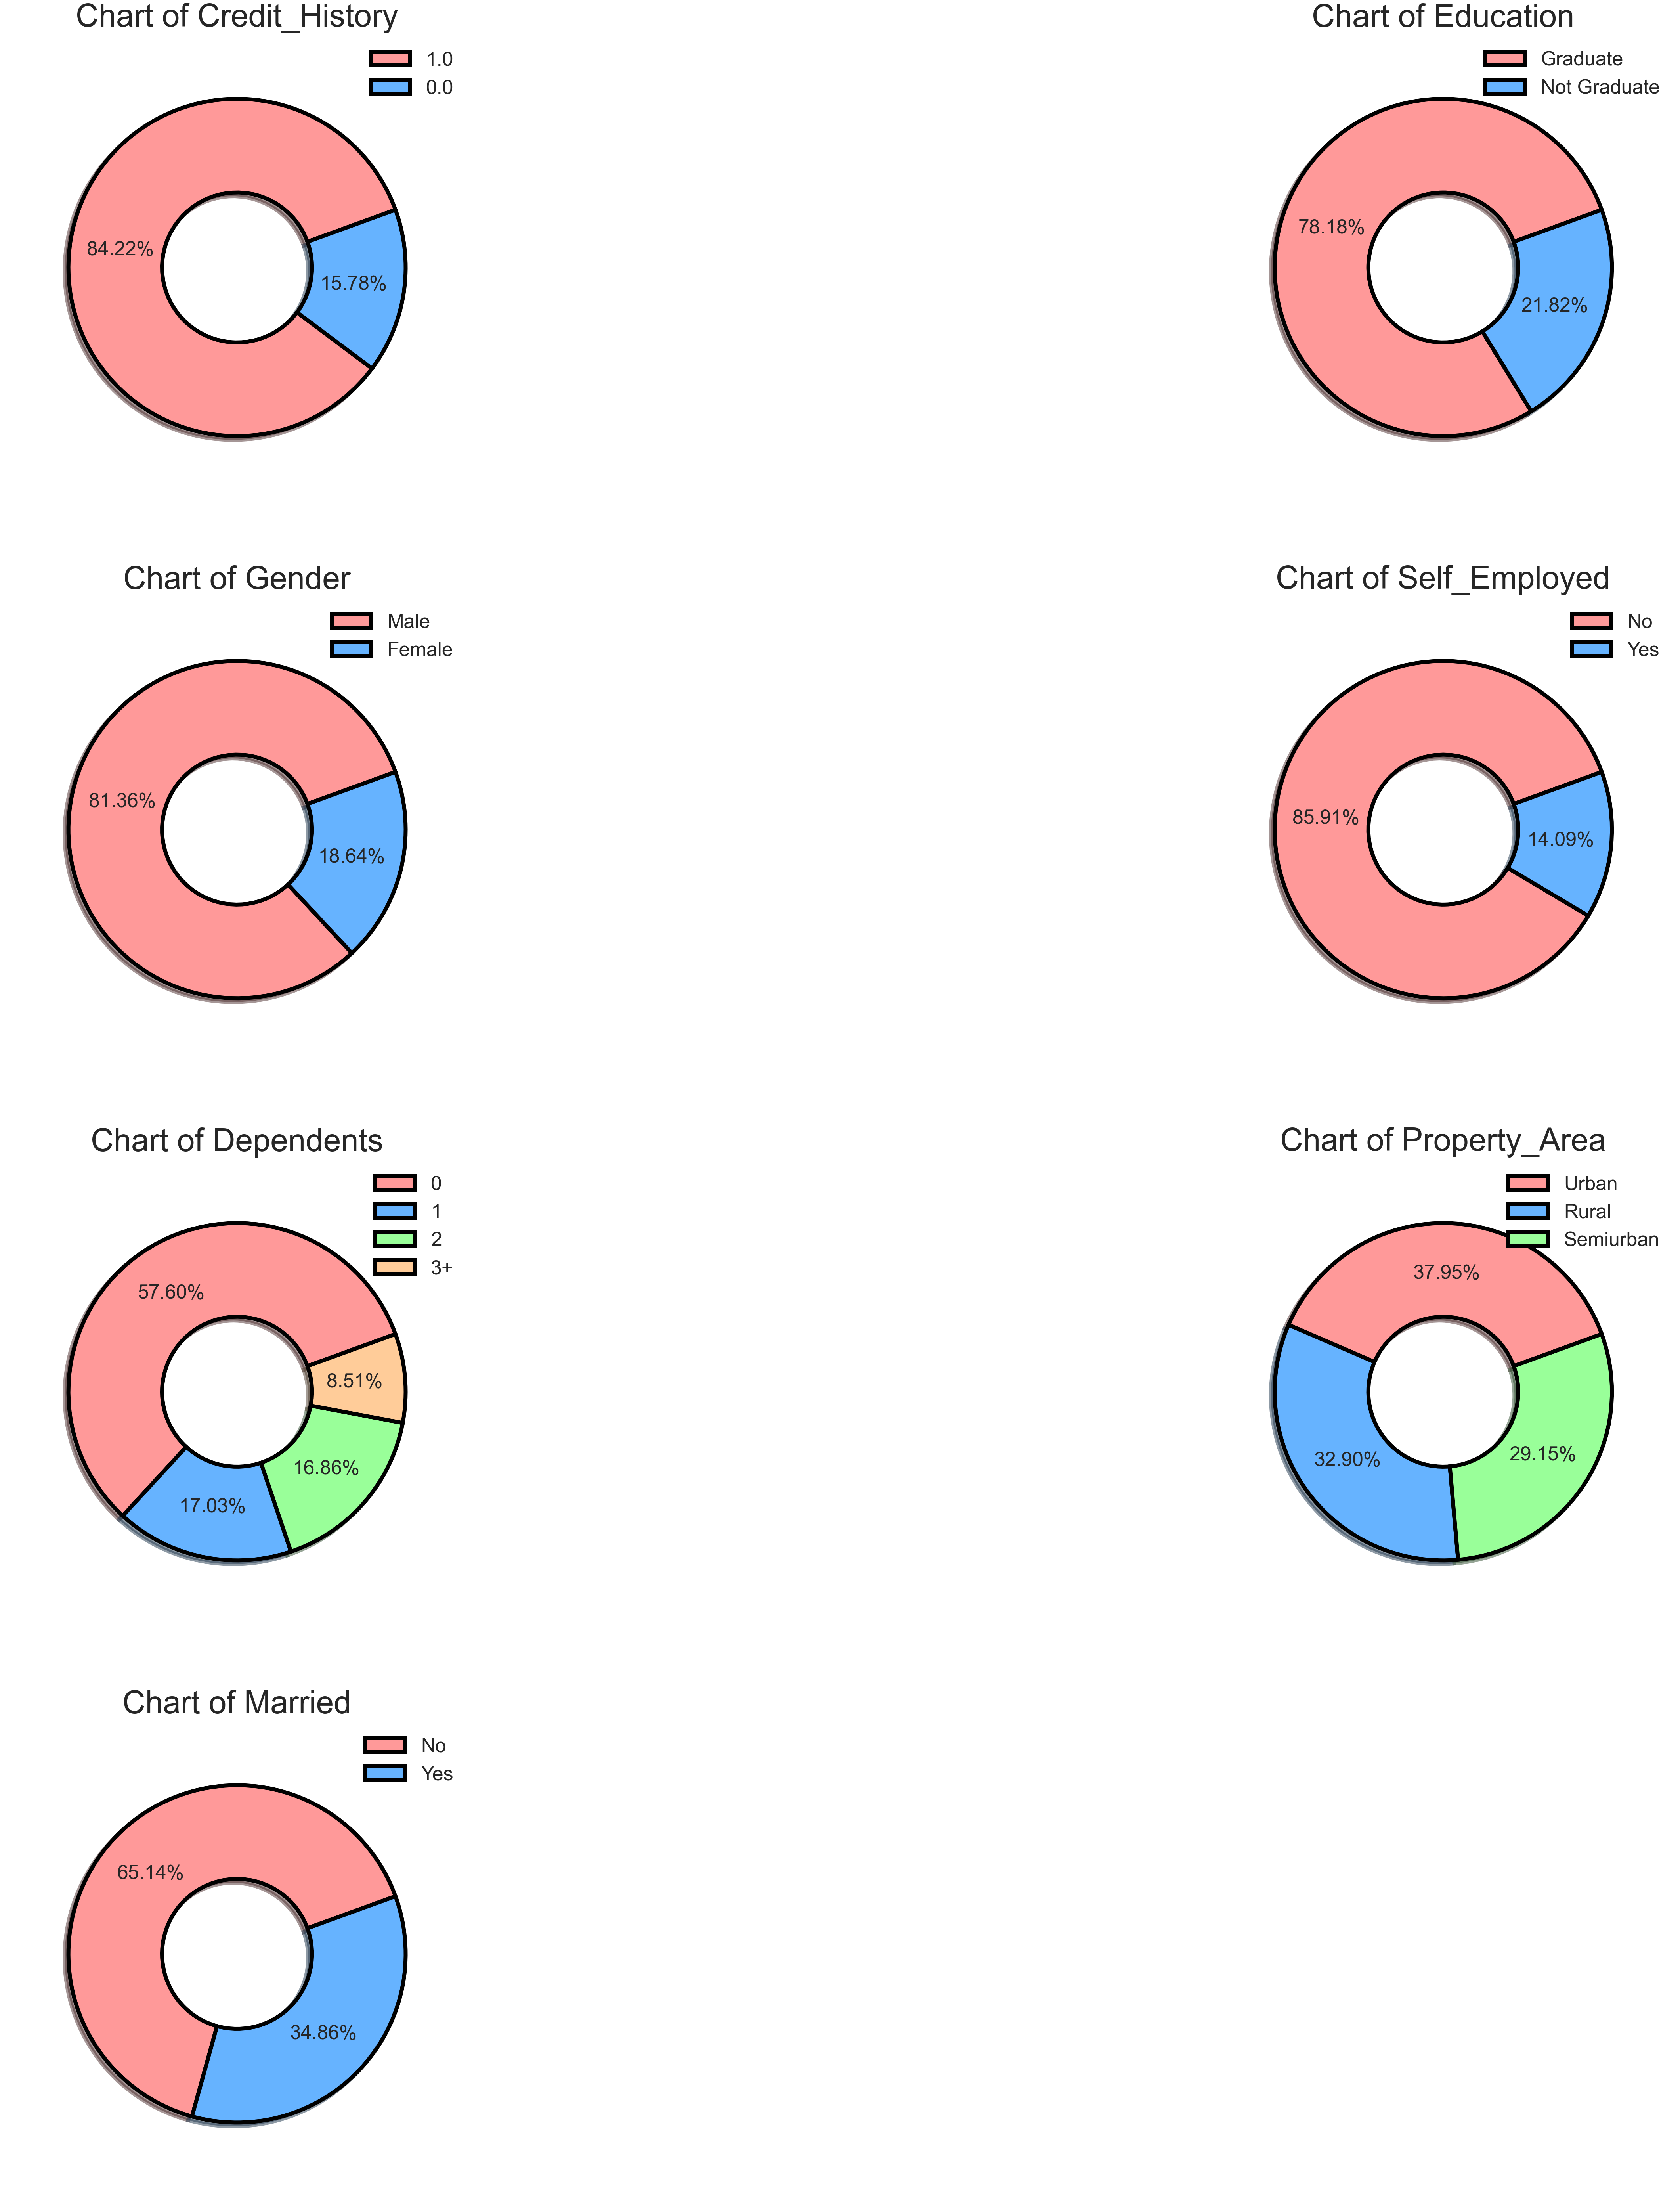

In [93]:
list=['Credit_History','Education','Gender','Self_Employed','Dependents','Property_Area','Married']
plt.figure(figsize=(100, 100))


for i,col in enumerate(list):
    plt.subplot(4,2,i+1)
    wedges, texts, autotext=plt.pie(df_copy[col].value_counts(),autopct='%.2f%%',pctdistance = 0.7,radius=.9, 
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], 
        textprops={'fontsize':50},
         shadow = True,
         startangle = 20,
        wedgeprops=dict(width = 0.5, edgecolor = "black",linewidth = 10))
    plt.legend(wedges,labels=df_copy[col].unique(),loc="upper right", edgecolor = "black",fontsize=50)
    plt.title('Chart of {}'.format(col),fontdict={'fontsize':80})
#To adjust the size of each subplot,
# we have used the ax.set_aspect() method with the parameter 'equal'. 
# This ensures that each subplot has the same width and height, and that the pie charts 
#are circular.


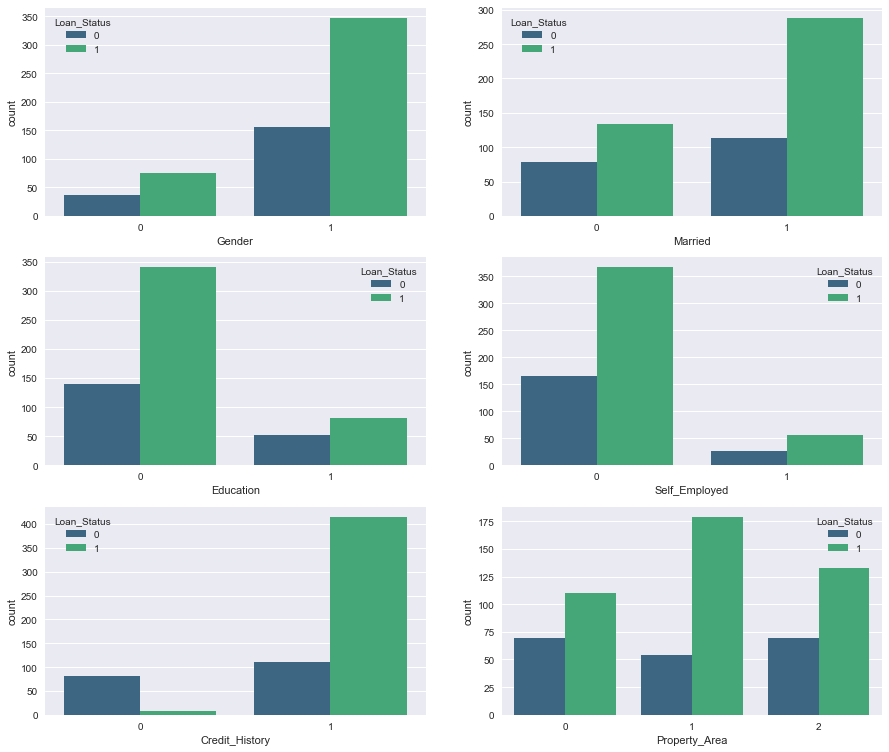

In [94]:

columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
plt.figure(figsize=(15,13))
for i,col in enumerate(columns):
    plt.subplot(3,2,i+1)
    sns.countplot(df[col],palette='viridis',hue=df['Loan_Status'])


# Model Training

In [95]:
df.drop('CoapplicantIncome',axis=1,inplace=True)

In [96]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

# Hypertuning parameter

In [98]:
t_model={'Logisticregression':{'model':LogisticRegression(),'param':{'C':[1,2,3]}},
        'Randomforest':{'model':RandomForestClassifier(),'param':{'n_estimators':[1,5,10,57]}},
       'Decisiontree':{'model':DecisionTreeClassifier(),'param':{'max_depth':[1,4,7,10,2,16]}},
        'Adaboosting':{'model':AdaBoostClassifier(),'param':{'n_estimators':[10,40,50,70],
                     'base_estimator':[None],'learning_rate':[0.2,0.3,0.5],'random_state':
                                                            [20,30,40,100]}}}

In [99]:
models=['Logisticregression','Randomforest','Decisiontree','Adaboosting']
scores=[]
for i in models:
    mp=t_model[i]
    gds=GridSearchCV(mp['model'],mp['param'],return_train_score=True,cv=5)
    gds.fit(x_train,y_train)
    scores.append({'model':i,'best_score':gds.best_score_,'best_parameter':gds.best_params_})
    
   

In [100]:
score=pd.DataFrame(scores)
score

,model,best_score,best_parameter
0,Logisticregression,0.797826,{'C': 2}
1,Randomforest,0.760870,{'n_estimators': 57}
2,Decisiontree,0.802174,{'max_depth': 1}
3,Adaboosting,0.802174,"{'base_estimator': None, 'learning_rate': 0.2,..."


# Models Evaluation

LogisticRegression()
model name  :   LogisticRegression()


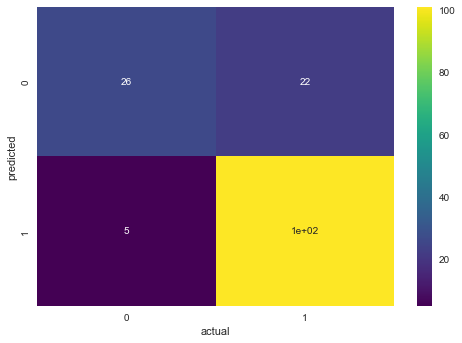

              precision    recall  f1-score   support

           0       0.84      0.54      0.66        48
           1       0.82      0.95      0.88       106

    accuracy                           0.82       154
   macro avg       0.83      0.75      0.77       154
weighted avg       0.83      0.82      0.81       154

accuracy score is :  0.8246753246753247
recall score is :  0.9528301886792453
precison score is : 0.8211382113821138
----------------------------------------------------------------------
RandomForestClassifier(n_estimators=44)
model name  :   RandomForestClassifier(n_estimators=44)


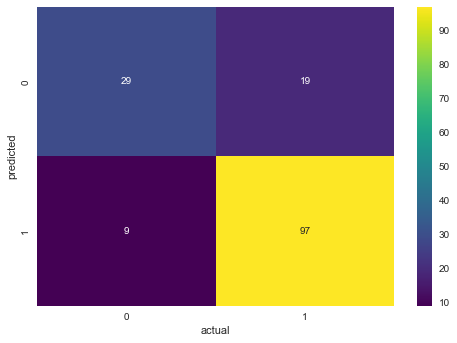

              precision    recall  f1-score   support

           0       0.76      0.60      0.67        48
           1       0.84      0.92      0.87       106

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

accuracy score is :  0.8181818181818182
recall score is :  0.9150943396226415
precison score is : 0.8362068965517241
----------------------------------------------------------------------
DecisionTreeClassifier(max_depth=4)
model name  :   DecisionTreeClassifier(max_depth=4)


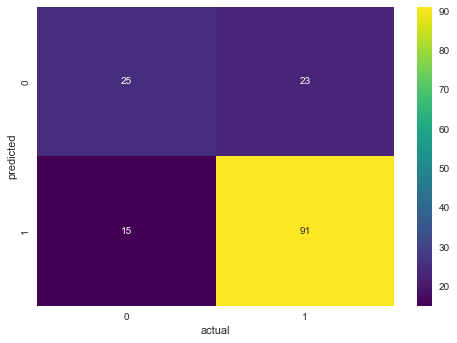

              precision    recall  f1-score   support

           0       0.62      0.52      0.57        48
           1       0.80      0.86      0.83       106

    accuracy                           0.75       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.74      0.75      0.75       154

accuracy score is :  0.7532467532467533
recall score is :  0.8584905660377359
precison score is : 0.7982456140350878
----------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.3, n_estimators=20, random_state=20)
model name  :   AdaBoostClassifier(learning_rate=0.3, n_estimators=20, random_state=20)


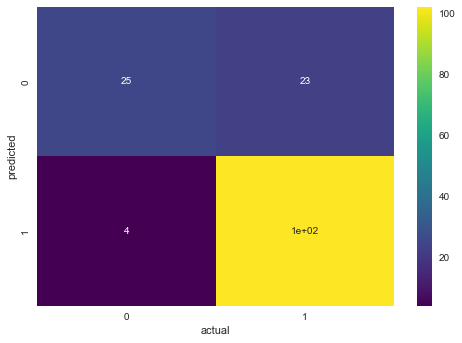

              precision    recall  f1-score   support

           0       0.86      0.52      0.65        48
           1       0.82      0.96      0.88       106

    accuracy                           0.82       154
   macro avg       0.84      0.74      0.77       154
weighted avg       0.83      0.82      0.81       154

accuracy score is :  0.8246753246753247
recall score is :  0.9622641509433962
precison score is : 0.816
----------------------------------------------------------------------


In [101]:
model3=[LogisticRegression(),RandomForestClassifier(n_estimators=44),DecisionTreeClassifier(max_depth=4),
        AdaBoostClassifier(n_estimators=20,learning_rate=0.3,base_estimator=None,random_state=20)]
for i in model3:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('model name  :  ',i)
    plt.style.use('seaborn')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.show()
    print(classification_report(y_test,y_pred))
    print('accuracy score is : ',accuracy_score(y_test,y_pred))
    print('recall score is : ',recall_score(y_test,y_pred))
    print('precison score is :',precision_score(y_test,y_pred))
    print('----------------------------------------------------------------------')

In [102]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [103]:
#predict using model
model.predict([[0,1,1,1,1,34000,360,2,1,2]])

array([1])